# Regresión lineal

## Comenzar definiendo las funciones para la Regresión Lineal

**Hipótesis:**<br>
$h_\theta = \theta_0 + \theta_1x$<br>
$h_\theta = \theta_0x_0 + \theta_1x_1$<br>
<br>Si hubiera más de una variable:<br>
$h_\theta = \theta_0x_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n$<br>
<br>Pero en general:<br>
$h_\theta = \theta^Tx$

<br>**Función de costo:**<br>
$J(\theta) = \frac{1}{2m}\sum_{i=1}^m \left(h_\theta(\mathbf{x}^i) - \mathbf{y}^i\right)^2$

<br>**Descenso de gradiente:**<br>
$\begin{align}
    \text{Repetir hasta convergencia: }\\[1em]
    \theta_j := \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta)
\end{align}$

donde:<br>
$\begin{align}
  \frac{\partial}{\partial\theta_0} =
  \frac{1}{m}\sum_{i=1}^m \left(h_\theta(\mathbf{x}^i) - \mathbf{y}^i\right)
\end{align}$
<br>
$\begin{align}
  \frac{\partial}{\partial\theta_1} =
  \frac{1}{m}\sum_{i=1}^m \left(h_\theta(\mathbf{x}^i) - \mathbf{y}^i\right)x^i_1
\end{align}$

In [15]:
# Importar bibliotecas de funciones
import numpy as np
from matplotlib import pyplot as plt

# Definir funciones de R. lineal
def h(X,theta):  #hipótesis (la recta)
  return np.dot(X, theta)

def J(X,theta): #función de error
  return np.sum(np.power((h(X,theta) - y),2))/(2*X.shape[0])

def dg(X,y,theta,alpha,epochs=10,verbose=False): #Descenso de gradiente
  m = X.shape[0]
  aux = theta.copy()
  er=[]
  for epoch in range(epochs):
    aux[0] = theta[0] - ((alpha/m) * np.sum((h(X,theta) - y) * X[:,0]))
    aux[1] = theta[1] - ((alpha/m) * np.sum((h(X,theta) - y) * X[:,1]))
    theta = aux
    er = np.append(er, J(X,theta))
    if verbose:
      if epoch%3==0:
        plt.plot(X[:,1:],y,'o')
        plt.plot(X[:,1:],h(X,theta))
        plt.xlabel('Tamaño de la casa', fontsize=15)
        plt.ylabel('Costo ($) de la casa', fontsize=15)
        title='Epoch: '+str(epoch+1)+'; theta: '+str(np.round(theta[0],2))+\
              ', '+str(np.round(theta[1],2))+'; error: '+str(np.round(er[epoch],2))
        plt.title(title)
        plt.show()
  return theta, er

def dg2(X,y,theta,alpha,epochs=10): #Descenso de gradiente
  m = X.shape[0]
  aux = theta.copy()
  er=[]
  for epoch in range(epochs):
    for j in range(len(theta)):
      aux[j] = theta[j] - ((alpha/m) * np.sum((h(X,theta) - y) * X[:,j]))
    theta=aux
    er = np.append(er, J(X,theta))
  return theta, er

## Importar los datos
Leer los datos y normalizar, según sea el caso

In [16]:
# Leer los datos
X = np.genfromtxt('0Casas-1var.csv', delimiter=',')
y = X[:,-1]
X = X[:,:-1]

# print(X.T)
# print(y)

In [19]:
# ¿Normalizar?
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(X)
X = norm.transform(X)
# print(X.T)

# Agregar un 1 en la columna del inicio
Xo = np.c_[np.ones(X.shape),X]
# print(Xo)

## Definir parámetros iniciales

In [20]:
# Parámetros

theta, epochs = np.array([1.42,4.2]), 120
# theta, epochs = np.array([5.,8.]), 275
alpha = 0.3

# Condiciones iniciales:
yw = h(Xo,theta)
e = J(Xo,theta)
print('y verdadera:\n',y)
print('\nyw inicial:\n', yw)
print('\nerror inicial:',e)
print('theta inicial:',theta)
print('alpha:',alpha)

y verdadera:
 [399900. 329900. 369000. 232000. 539900. 299900. 314900. 198999. 212000.
 242500. 239999. 347000. 329999. 699900. 259900. 449900. 299900. 199900.
 499998. 599000. 252900. 255000. 242900. 259900. 573900. 249900. 464500.
 469000. 475000. 299900. 349900. 169900. 314900. 579900. 285900. 249900.
 229900. 345000. 549000. 287000. 368500. 329900. 314000. 299000. 179900.
 299900. 239500.]

yw inicial:
 [2.87019305 2.28640927 3.21305019 2.07328185 3.90803089 2.73235521
 2.20996139 2.08602317 2.03158301 2.16362934 2.68023166 2.74972973
 2.6223166  5.62       1.90185328 3.09722008 1.96208494 1.86478764
 3.45513514 3.94393822 2.47984556 2.62       2.29104247 2.70571429
 4.93891892 1.70725869 2.1219305  3.35899614 2.98138996 3.48756757
 2.56324324 1.59142857 2.79606178 4.06671815 2.53081081 2.09760618
 1.86826255 2.90262548 5.3153668  2.93737452 2.36054054 3.02540541
 3.40648649 1.8230888  1.42       2.57830116 1.82656371]

error inicial: 65590515484.28178
theta inicial: [1.42 4.2 ]
al

## Aplicar la regresión lineal

In [27]:
# La regresión lineal
theta = np.array([1.42,4.2])
alpha=0.3
epochs = 250

th1, er1 = dg(Xo,y,theta,alpha,epochs=epochs,verbose=False) #Usando la primera versión de DG
print('Nuevo theta dg1: {} en {} epochs con error {}. Línea verde'.format(th1,epochs,J(Xo,th1)))

th2, er2 = dg2(Xo,y,theta,alpha,epochs=epochs*2) #Usando la 2a versión de DG
print('Nuevo theta dg2: {} en {} epochs con error {}. Línea magenta'.format(th2,epochs*2,J(Xo,th2)))

Nuevo theta dg1: [190788.95252434 472989.64542952] en 250 epochs con error 2063303940.317128. Línea verde
Nuevo theta dg2: [186065.71975968 487246.33732553] en 500 epochs con error 2058139685.7583385. Línea magenta


In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
ylr = reg.predict(X)
thetaskl = np.array([reg.intercept_,reg.coef_[0]], dtype='float')
sklerror = J(Xo,thetaskl)
print(f'Nuevo theta en sklearn: {reg.intercept_},{reg.coef_[0]}; error: {sklerror}. Línea roja')

Nuevo theta en sklearn: 185886.03758637473,487788.6932735951; error: 2058132740.433042. Línea roja


## Resultados y gráficas

In [ ]:
# theta, epochs = np.array([1.42,4.2]), 120
theta, epochs = np.array([-150000.,-280000.]), 500
alpha = 0.3
th1, er1 = dg(Xo,y,theta,alpha,epochs=epochs,verbose=True) #Usando la primera versión de DG

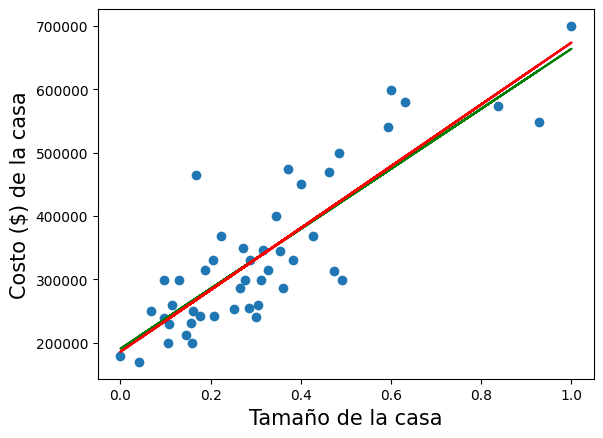

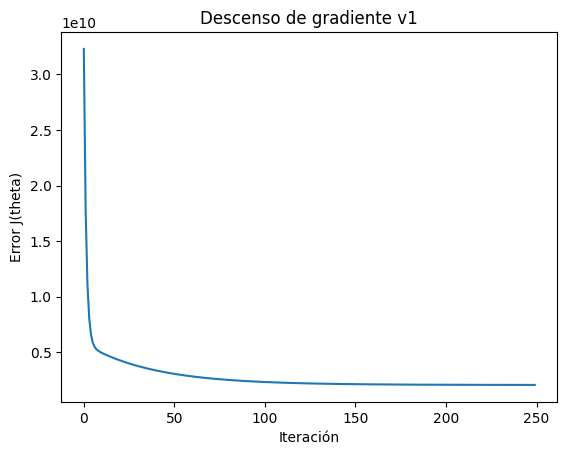

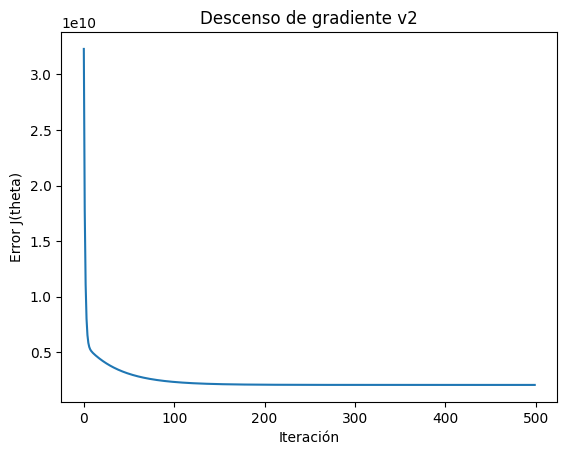

In [28]:
# print('y verdadera: ',y)
# print('y estimada:', ylr)

plt.plot(X,y,'o')
plt.plot(X,h(Xo,th1),'g')
plt.plot(X,h(Xo,th2),'m')
plt.plot(X,ylr,'r')
plt.xlabel('Tamaño de la casa', fontsize=15)
plt.ylabel('Costo ($) de la casa', fontsize=15)
#plt.show()

ep1 = []
ep2 = []
for i in range(epochs):
  ep1.append(i)
for i in range(epochs*2):
  ep2.append(i)

plt.figure()
plt.plot(ep1,er1)
plt.xlabel('Iteración')
plt.ylabel('Error J(theta)')
plt.title('Descenso de gradiente v1')

plt.figure()
plt.plot(ep2,er2)
plt.xlabel('Iteración')
plt.ylabel('Error J(theta)')
plt.title('Descenso de gradiente v2')

plt.show()